In [1]:
%matplotlib inline


Gaussian HMM of accel_walk
--------------------------


In [4]:
from __future__ import print_function
import datetime
import json
from pprint import pprint
import numpy as np
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
from hmmlearn.hmm import GaussianHMM

In [39]:

with open('/Users/DoerLBH/Dropbox/git/DREAM_PDBiomarker/test_walk_outbound.json') as data_file:    
    data = json.load(data_file)

timestamp = np.array([data[t]['timestamp'] for t in list(range(0, len(data)))],dtype=float)
x = np.array([data[t]['x'] for t in list(range(0, len(data)))],dtype=float)
y = np.array([data[t]['y'] for t in list(range(0, len(data)))],dtype=float)
z = np.array([data[t]['z'] for t in list(range(0, len(data)))],dtype=float)

# timestamp

In [40]:

# Pack x,y,z for training.
X = np.column_stack([x, y, z])


Run Gaussian HMM



In [41]:
print("fitting to HMM and decoding ...", end="")

single_nstates = 10;

startprob = np.ones(2*single_nstates+2)
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.zeros(shape=(2*single_nstates+2,2*single_nstates+2))
for f in range(1, single_nstates+1):
    transmat[f][f] = 1/2
    transmat[f][f+1] = 1/2
    transmat[f+single_nstates][f+single_nstates] = 1/2
    transmat[f+single_nstates][f+1+single_nstates] = 1/2

half_nstates = int(single_nstates/2)
transmat[0][0] = 1/5
transmat[0][1] = 1/5
transmat[0][1+half_nstates] = 1/5
transmat[0][1+2*half_nstates] = 1/5
transmat[0][1+3*half_nstates] = 1/5

transmat[half_nstates][half_nstates] = 1/3
transmat[half_nstates][half_nstates+1] = 1/3
transmat[half_nstates][2*single_nstates+1] = 1/3

transmat[2*half_nstates][2*half_nstates] = 1/3
transmat[2*half_nstates][1] = 1/3
transmat[2*half_nstates][2*single_nstates+1] = 1/3

transmat[3*half_nstates][3*half_nstates] = 1/3
transmat[3*half_nstates][3*half_nstates+1] = 1/3
transmat[3*half_nstates][2*single_nstates+1] = 1/3

transmat[4*half_nstates][4*half_nstates] = 1/3
transmat[4*half_nstates][2*half_nstates+1] = 1/3
transmat[4*half_nstates][2*single_nstates+1] = 1/3

# Build an HMM instance and set parameters
model = GaussianHMM(n_components=single_nstates, covariance_type="diag", n_iter=100)
model.startprob_ = startprob
model.transmat_ = transmat
# model.means_ = means

# Make an HMM instance and execute fit
model.fit(X)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X)

print("done")

fitting to HMM and decoding ...

/Users/DoerLBH/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/DoerLBH/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/DoerLBH/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/DoerLBH/anaconda/lib/python3.6/site-pac

/Users/DoerLBH/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/DoerLBH/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/DoerLBH/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/DoerLBH/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.p

done


/Users/DoerLBH/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/DoerLBH/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/DoerLBH/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/DoerLBH/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.p

Print trained parameters and plot



Transition matrix
[[  9.12938489e-001   4.47925229e-042   2.42383576e-002   3.79175485e-003
    5.38572170e-002   1.27897064e-187   2.69950294e-127   5.17418198e-003
    1.76017054e-024   5.08934356e-019]
 [  2.90734424e-020   8.44041678e-001   8.12631921e-003   2.38942797e-030
    3.39145371e-002   7.86930393e-003   1.89067908e-031   5.28912076e-002
    4.87410422e-002   4.41591188e-003]
 [  8.54855155e-008   5.29150206e-002   8.90671047e-001   4.13040043e-005
    4.25214611e-027   1.92536677e-091   2.70484922e-003   1.28506353e-002
    4.08170586e-002   2.50578407e-072]
 [  2.04942084e-004   7.57220058e-004   8.73658637e-030   7.21547050e-001
    1.46762300e-002   5.22075171e-048   1.85568652e-001   1.83726187e-032
    1.50513083e-064   7.72459058e-002]
 [  1.09384976e-002   5.20641179e-003   8.36722745e-003   5.23738183e-022
    8.84002173e-001   3.99654319e-002   1.81350525e-093   3.87852333e-003
    3.75549967e-002   1.00867380e-002]
 [  9.97716350e-029   3.60052008e-002   4.04124

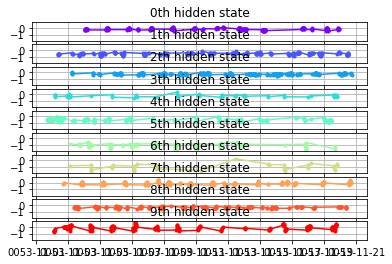

In [45]:
print("Transition matrix")
print(model.transmat_)
print()

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(timestamp[mask], x[mask], ".-", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
#     ax.xaxis.set_major_locator(YearLocator())
#     ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)

plt.show()

In [46]:
# Plot the predicted
plt.plot(hidden_states[:, 0], hidden_states[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()

IndexError: too many indices for array